In [556]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage.interpolation import rotate



# Naive one dimensional case
with noise

In [269]:
num_pixels_x = 100
a_x = np.linspace(-np.pi/2, np.pi/2, num_pixels_x)

In [302]:
accel = 1
v1 = 3
d1 = 3
dt = 0.05

In [303]:
v2 = v1 + accel*dt
d2 = d1 + v2*dt

In [339]:
noise = 0.02

alphadot1_x = v1/d1*(np.sin(a_x)*np.cos(a_x)) + np.random.normal(0, noise, a_x.shape)
alphadot2_x = v2/d2*(np.sin(a_x)*np.cos(a_x)) + np.random.normal(0, noise, a_x.shape)

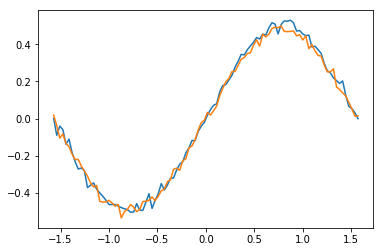

In [340]:
plt.plot(a_x, alphadot1_x)
plt.plot(a_x, alphadot2_x)

In [341]:
r1 = alphadot1_x / (np.sin(a_x)*np.cos(a_x))
r2 = alphadot2_x / (np.sin(a_x)*np.cos(a_x))

In [342]:
rdot = (r2-r1) / dt

In [343]:
r = np.mean([r1, r2], axis=0)
v_over_a_x = r / (r**2 + rdot)

In [344]:
print('vel / accel = ', np.mean(v_over_a_x))
print('vel / accel = ', np.median(v_over_a_x))
print('should be: ', np.mean([v1, v2]))

vel / accel =  -0.895474449264604
vel / accel =  0.22082559847434463
should be:  3.025


# Mean
Doesn't work

In [345]:
r1 = np.mean(alphadot1_x / (np.sin(a_x)*np.cos(a_x)))
r2 = np.mean(alphadot2_x / (np.sin(a_x)*np.cos(a_x)))

In [346]:
rdot = (r2-r1) / dt

In [347]:
r = np.mean([r1, r2], axis=0)
v_over_a_x = r / (r**2 + rdot)

In [348]:
print('vel / accel = ', v_over_a_x)
print('should be: ', np.mean([v1, v2]))

vel / accel =  -2.0599227896475705e-12
should be:  3.025


# Median
Works much better

In [349]:
r1 = np.median(alphadot1_x / (np.sin(a_x)*np.cos(a_x)))
r2 = np.median(alphadot2_x / (np.sin(a_x)*np.cos(a_x)))

In [350]:
rdot = (r2-r1) / dt

In [351]:
r = np.mean([r1, r2], axis=0)
v_over_a_x = r / (r**2 + rdot)

In [352]:
print('vel / accel = ', v_over_a_x)
print('should be: ', np.mean([v1, v2]))

vel / accel =  3.129567655672282
should be:  3.025


# Now in 2D

In [662]:
num_pixels_x = 61
num_pixels_y = 41

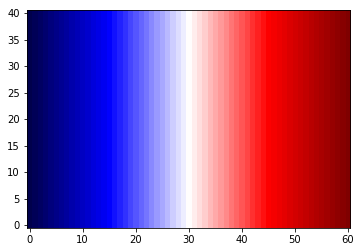

In [663]:
a_x = np.vstack([np.linspace(-np.pi/2, np.pi/2, num_pixels_x)]*num_pixels_y)
plt.imshow(a_x, cmap='seismic', origin='lower')

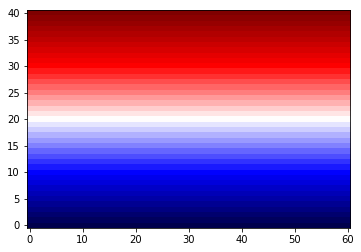

In [664]:
a_y = np.vstack([np.linspace(-np.pi/2, np.pi/2, num_pixels_y)]*num_pixels_x).T
plt.imshow(a_y, cmap='seismic', origin='lower')

In [905]:
noise = 0.03

In [906]:
alphadot1_x = v1/d1*(np.sin(a_x)*np.cos(a_x)) + np.random.normal(0, noise, a_x.shape)
alphadot1_y = v1/d1*(np.sin(a_y)*np.cos(a_y)) + np.random.normal(0, noise, a_x.shape)

In [907]:
alphadot2_x = v2/d2*(np.sin(a_x)*np.cos(a_x)) + np.random.normal(0, noise, a_x.shape)
alphadot2_y = v2/d2*(np.sin(a_y)*np.cos(a_y)) + np.random.normal(0, noise, a_x.shape)

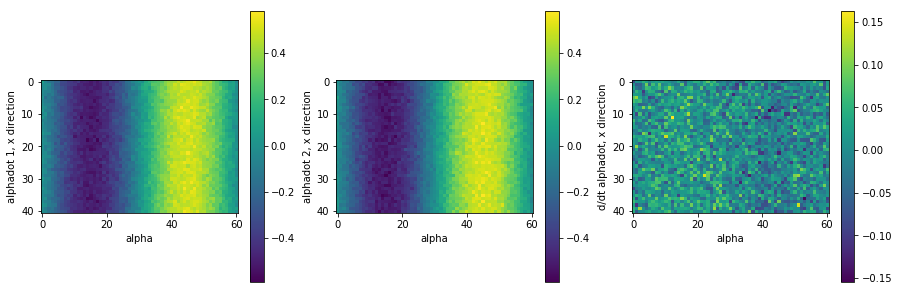

In [908]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1,3,1)
a1 = ax.imshow(alphadot1_x)
ax.set_xlabel('alpha')
ax.set_ylabel('alphadot 1, x direction')
fig.colorbar(a1, ax=ax)

ax = fig.add_subplot(1,3,2)
a2 = ax.imshow(alphadot2_x)
ax.set_xlabel('alpha')
ax.set_ylabel('alphadot 2, x direction')
fig.colorbar(a1, ax=ax)

ax = fig.add_subplot(1,3,3)
a3 = ax.imshow(alphadot2_x - alphadot1_x)
ax.set_xlabel('alpha')
ax.set_ylabel('d/dt alphadot, x direction')
fig.colorbar(a3, ax=ax)

# Along the horizontal

In [909]:
midx = int(a_x.shape[0]/2)
alphadot1_x0 = alphadot1_x[midx, :]
alphadot2_x0 = alphadot2_x[midx, :]

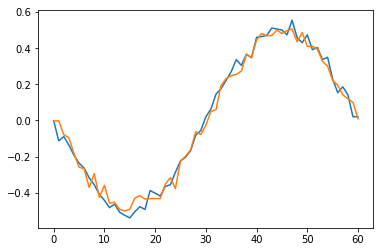

In [910]:
plt.plot(alphadot1_x0)
plt.plot(alphadot2_x0)

In [911]:
r1 = np.nanmedian(alphadot1_x0 / (np.sin(a_x[0,:])*np.cos(a_x[0,:])))
r2 = np.nanmedian(alphadot2_x0 / (np.sin(a_x[0,:])*np.cos(a_x[0,:])))

/home/caveman/BMD2/lib/python3.5/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
/home/caveman/BMD2/lib/python3.5/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


In [912]:
rdot = (r2-r1) / dt

In [913]:
r = np.mean([r1, r2], axis=0)
v_over_a_x = r / (r**2 + rdot)

In [914]:
print('vel / accel = ', v_over_a_x)
print('should be: ', np.mean([v1, v2]))

vel / accel =  4.560425644923018
should be:  3.025


# Along the vertical

In [915]:
midy = int(a_x.shape[1]/2)
alphadot1_y0 = alphadot1_y[:, midy]
alphadot2_y0 = alphadot2_y[:, midy]

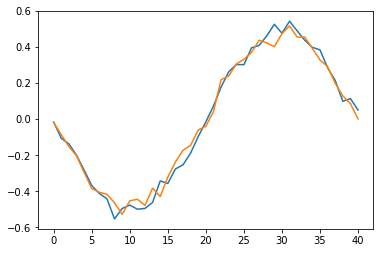

In [916]:
plt.plot(alphadot1_y0)
plt.plot(alphadot2_y0)

In [917]:
r1 = np.nanmedian(alphadot1_y0 / (np.sin(a_y[:,0])*np.cos(a_y[:,0])))
r2 = np.nanmedian(alphadot2_y0 / (np.sin(a_y[:,0])*np.cos(a_y[:,0])))

/home/caveman/BMD2/lib/python3.5/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
/home/caveman/BMD2/lib/python3.5/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


In [918]:
rdot = (r2-r1) / dt

In [919]:
r = np.mean([r1, r2], axis=0)
v_over_a_x = r / (r**2 + rdot)

In [920]:
print('vel / accel = ', v_over_a_x)
print('should be: ', np.mean([v1, v2]))

vel / accel =  -14.436309987104947
should be:  3.025


# Now generalize.. along any line that goes through the center of expansion

In [921]:
def get_alphadot_transect(angle, a_x, a_y, alphadot_x, alphadot_y): # angle in degrees
    rotated_alphadot_x = rotate(alphadot_x, angle=angle)
    rotated_a_x = rotate(a_x, angle=angle)
    
    r1 = np.median(alphadot1_x0[0, :] / (np.sin(a_x[0,:])*np.cos(a_x[0,:])))
    r2 = np.median(alphadot2_x0[0, :] / (np.sin(a_x[0,:])*np.cos(a_x[0,:])))

In [922]:
def get_rx_for_transect_at_angle(angle, a_x, alphadot_x):
    rotated_alphadot_x = rotate(alphadot_x, angle=angle, cval=np.nan)
    rotated_a_x = rotate(a_x, angle=angle, cval=np.nan)

    midx = int(rotated_a_x.shape[0]/2)

    rx = np.nanmedian(rotated_alphadot_x[midx, :] / (np.sin(rotated_a_x[midx,:])*np.cos(rotated_a_x[midx,:])))
    
    return rx


def get_ry_for_transect_at_angle(angle, a_y, alphadot_y):
    rotated_alphadot_y = rotate(alphadot_y, angle=angle, cval=np.nan)
    rotated_a_y = rotate(a_y, angle=angle, cval=np.nan)

    midy = int(rotated_a_y.shape[1]/2)

    ry = np.nanmedian(rotated_alphadot_y[midy, :] / (np.sin(rotated_a_y[midy, :])*np.cos(rotated_a_y[midy, :])))
    
    return ry

In [923]:
def get_v_over_a_for_angle(angle, a_x, a_y, alphadot1_x, alphadot2_x, alphadot1_y, alphadot2_y):
    r1x = get_rx_for_transect_at_angle(angle, a_x, alphadot1_x)
    r2x = get_rx_for_transect_at_angle(angle, a_x, alphadot2_x)

    r1y = get_rx_for_transect_at_angle(angle, a_y, alphadot1_y)
    r2y = get_rx_for_transect_at_angle(angle, a_y, alphadot2_y)

    rdotx = (r2x-r1x) / dt
    rdoty = (r2y-r1y) / dt

    rx = np.mean([r1x, r2x], axis=0)
    v_over_a_x = rx / (rx**2 + rdotx)

    ry = np.mean([r1y, r2y], axis=0)
    v_over_a_y = ry / (ry**2 + rdoty)

    return np.max([v_over_a_x, v_over_a_y])

In [924]:
values = []
angles = np.linspace(0, 360, 20).astype(float)

for angle in angles:
    values.append(get_v_over_a_for_angle(angle, a_x, a_y, alphadot1_x, alphadot2_x, alphadot1_y, alphadot2_y))

In [925]:
np.median(values)

3.3086481055483543

In [734]:
rotated_a_x = rotate(a_x, angle=angle, cval=np.nan)

midx = int(rotated_a_x.shape[0]/2)

In [735]:
midx

20

In [629]:
rotated_alphadot_x[0, :]

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan])

In [631]:
rx

0.9985750330861534

In [602]:
angle = 45
alphadot_x = alphadot1_x

rotated_alphadot_x = rotate(alphadot_x, angle=angle, cval=np.nan)
rotated_a_x = rotate(a_x, angle=angle, cval=np.nan)

midx = int(rotated_a_x.shape[0]/2)

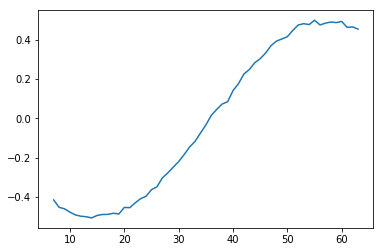

In [603]:
plt.plot(rotated_alphadot_x[midx, :])

In [604]:
angle = 45
alphadot_y = alphadot1_y

rotated_alphadot_y = rotate(alphadot_y, angle=angle, cval=np.nan)
rotated_a_y = rotate(a_y, angle=angle, cval=np.nan)

midy = int(rotated_a_y.shape[1]/2)

In [605]:
rotated_alphadot_y[midy]

array([        nan,         nan,         nan,         nan,         nan,
               nan,         nan,  0.00149589, -0.06352618, -0.13347117,
       -0.16614408, -0.23432326, -0.26983445, -0.32557722, -0.37014449,
       -0.40252197, -0.42199388, -0.45332293, -0.4824858 , -0.50098224,
       -0.49132713, -0.49926347, -0.49077484, -0.47670651, -0.48375476,
       -0.45313444, -0.4075012 , -0.37930001, -0.3654415 , -0.30607619,
       -0.25880704, -0.21473848, -0.15282041, -0.1186607 , -0.06162496,
        0.00708605,  0.06584467,  0.12112781,  0.15614118,  0.23717667,
        0.26515117,  0.29692448,  0.3376216 ,  0.36431502,  0.40549945,
        0.45228195,  0.46787964,  0.48947089,  0.49647997,  0.5086379 ,
        0.49844147,  0.49803111,  0.47481694,  0.46029063,  0.42604773,
        0.39113127,  0.36119905,  0.32553424,  0.27673902,  0.22247813,
        0.16732906,  0.12604381,  0.06333851,  0.00987426,         nan,
               nan,         nan,         nan,         nan,      

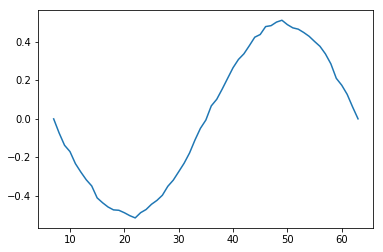

In [606]:
plt.plot(rotated_alphadot_y[:, midy])

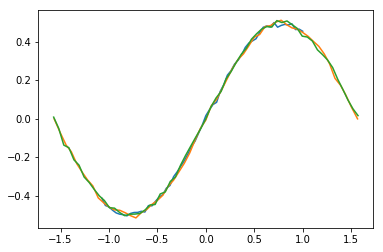

In [622]:
plt.plot(rotated_a_x[midx, :], rotated_alphadot_x[midx, :]) 
plt.plot(rotated_a_y[:, midy], rotated_alphadot_y[:, midy]) 

plt.plot(a_x[0,:], alphadot1_x0)

# Matched filter method

In [540]:
def get_matched_filter(desired_angle, a_x, a_y, plot=True):
    a = np.arctan2(a_y, a_x)
    
    amag = np.sqrt(a_x**2 + a_y**2)
    
    if desired_angle == 'radial':
        mf = 1
        scale = 50
    else:
        mf = (1 - np.abs(a - desired_angle)/np.pi)**20
        mf /= np.linalg.norm(mf)
        mf *= 2 # need the times two because we are only taking half of the flow
        scale = 1
        
    mf_x = mf*a_x / amag
    #mf_x /= np.linalg.norm(mf_x)
    mf_y = mf*a_y / amag
    #mf_y /= np.linalg.norm(mf_y)
    
    if plot:
        fig = plt.figure(figsize=(15,15))
        ax = fig.add_subplot(111)
        ax.quiver(a_x, a_y, mf_x, mf_y, scale=scale)
        ax.set_aspect('equal')
    return mf_x, mf_y

In [541]:
def apply_matched_filter(desired_angle, a_x, a_y, alphadot_x, alphadot_y):
    mf_x, mf_y = get_matched_filter(desired_angle, a_x, a_y, plot=False)
    
    return mf_x*alphadot_x*np.sign(np.sin(a_x)) + mf_y*alphadot_y*np.sign(np.sin(a_y))

# example along angle = 0 and 180 deg

/home/caveman/BMD2/lib/python3.5/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app
/home/caveman/BMD2/lib/python3.5/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide


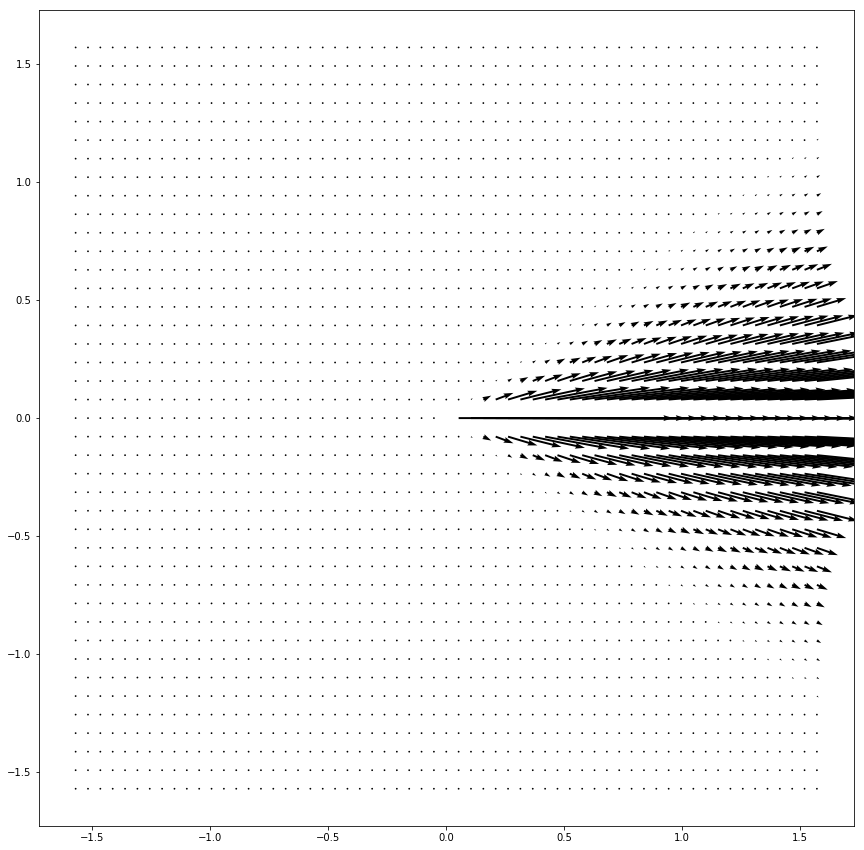

In [542]:
mf_x, mf_y = get_matched_filter(0*np.pi/180, a_x, a_y)

/home/caveman/BMD2/lib/python3.5/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app
/home/caveman/BMD2/lib/python3.5/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide


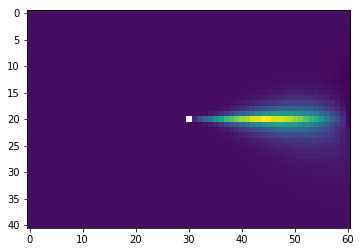

In [543]:
filtered = apply_matched_filter(0*np.pi/180, a_x, a_y, alphadot1_x, alphadot1_y)
plt.imshow(filtered)

In [544]:
filtered = apply_matched_filter(0*np.pi/180, a_x, a_y, alphadot1_x, alphadot1_y)

/home/caveman/BMD2/lib/python3.5/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app
/home/caveman/BMD2/lib/python3.5/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide


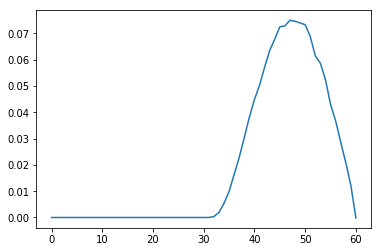

/home/caveman/BMD2/lib/python3.5/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app
/home/caveman/BMD2/lib/python3.5/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide


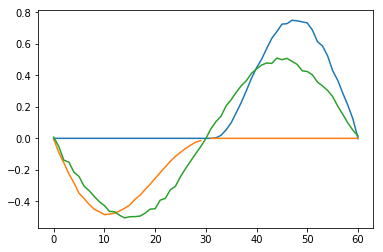

In [551]:
filtered = apply_matched_filter(0*np.pi/180, a_x, a_y, alphadot1_x, alphadot1_y)
plt.plot(filtered[21, :]*10)

filtered = apply_matched_filter(180*np.pi/180, a_x, a_y, alphadot1_x, alphadot1_y)
plt.plot( np.sum(filtered, axis=0) )

plt.plot(alphadot1_x0)

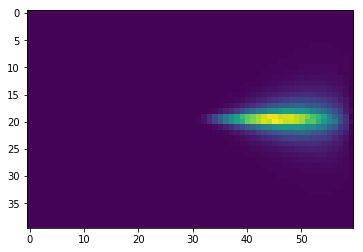

In [475]:
plt.imshow(mf_x*alphadot1_x)

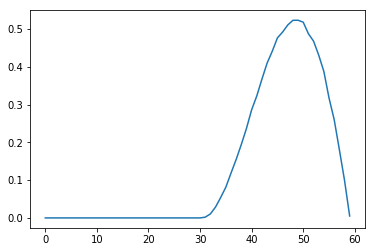

In [476]:
plt.plot( np.sum(mf_x*alphadot1_x, axis=0) )

In [387]:
def apply_matched_filter(desired_angle, a_x, a_y, alphadot_x, alphadot_y):
    mf_x, mf_y = get_matched_filter(desired_angle, a_x, a_y, plot=False)
    return mf_x*alphadot_x/(np.sin(a_x)*np.cos(a_y)), mf_y*alphadot_y/(np.sin(a_x)*np.cos(a_y))

In [388]:
def get_vel_over_accel_for_filter(desired_angle, alphadot1_x, alphadot1_y, alphadot2_x, alphadot2_y):
    r1x, r1y = apply_matched_filter(desired_angle, a_x, a_y, alphadot1_x, alphadot1_y)
    r2x, r2y = apply_matched_filter(desired_angle, a_x, a_y, alphadot2_x, alphadot2_y)
    
    r1x = np.median(r1x)
    r2x = np.median(r2x)
    
    rx = np.mean([r1x, r2x])
    rxdot = (r2x-r1x)/dt
    
    r1x_sq, r1y_sq = apply_matched_filter(desired_angle, a_x, a_y, alphadot1_x**2, alphadot1_y**2)
    r2x_sq, r2y_sq = apply_matched_filter(desired_angle, a_x, a_y, alphadot2_x**2, alphadot2_y**2)
    
    r1x_sq = np.median(r1x_sq)
    r2x_sq = np.median(r2x_sq)
    
    rx_sq = np.mean([r1x_sq, r2x_sq])
    
    v_over_a = rx / (rx_sq + rxdot)
    
    return v_over_a

In [391]:
get_vel_over_accel_for_filter('radial', alphadot1_x, alphadot1_y, alphadot2_x, alphadot2_y)

0.0

In [410]:
desired_angle = np.pi/4

r1x, r1y = apply_matched_filter(desired_angle, a_x, a_y, alphadot1_x, alphadot1_y)
r2x, r2y = apply_matched_filter(desired_angle, a_x, a_y, alphadot2_x, alphadot2_y)

In [411]:
r1x = np.median(r1x)
r2x = np.median(r2x)

rx = np.mean([r1x, r2x])
rxdot = (r2x-r1x)/dt

r1x_sq, r1y_sq = apply_matched_filter(desired_angle, a_x, a_y, alphadot1_x**2, alphadot1_y**2)
r2x_sq, r2y_sq = apply_matched_filter(desired_angle, a_x, a_y, alphadot2_x**2, alphadot2_y**2)

r1x_sq = np.median(r1x_sq)
r2x_sq = np.median(r2x_sq)

rx_sq = np.mean([r1x_sq, r2x_sq])

v_over_a_x = rx / (rx_sq + rxdot)

In [412]:
v_over_a_x

6.744574932339425e-08

In [413]:
r1y = np.median(r1y)
r2y = np.median(r2y)

ry = np.mean([r1y, r2y])
rydot = (r2y-r1y)/dt

r1y_sq, r1y_sq = apply_matched_filter(desired_angle, a_x, a_y, alphadot1_x**2, alphadot1_y**2)
r2y_sq, r2y_sq = apply_matched_filter(desired_angle, a_x, a_y, alphadot2_x**2, alphadot2_y**2)

r1y_sq = np.median(r1y_sq)
r2y_sq = np.median(r2y_sq)

ry_sq = np.mean([r1y_sq, r2y_sq])

v_over_a_y = ry / (ry_sq + rydot)

In [414]:
v_over_a_y

-1.5128038626173532

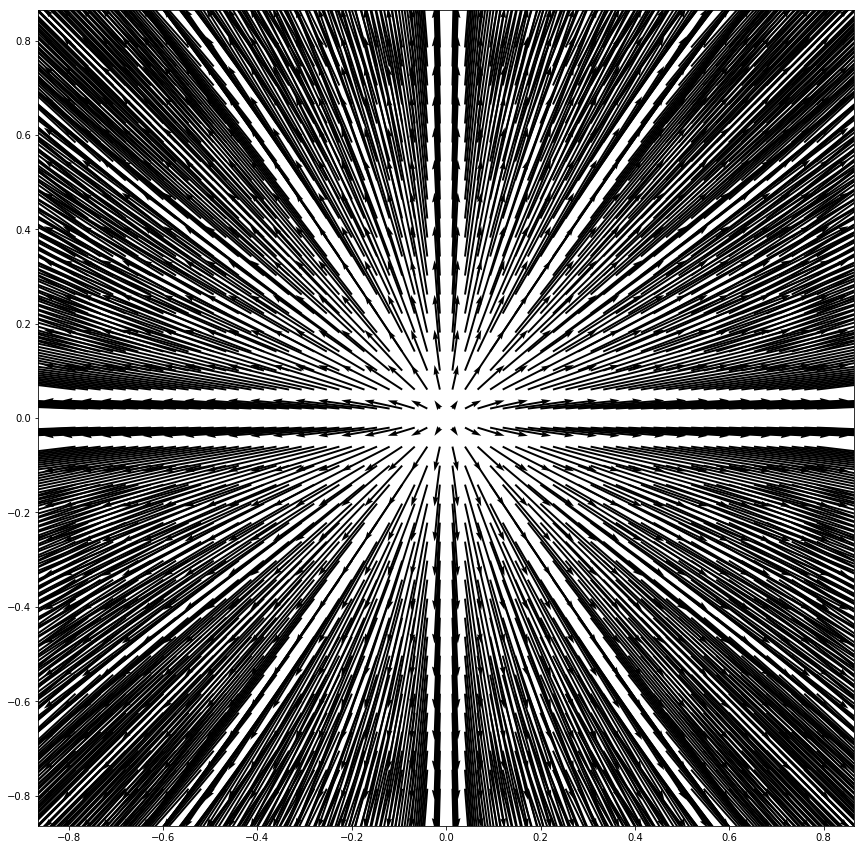

In [18]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
ax.quiver(a_x, a_y, alphadot1_x, alphadot1_y, scale=1)
ax.set_aspect('equal')

In [19]:
v_over_a_x = alphadot1_x / (alphadot1_x**2 + (alphadot2_x-alphadot1_x)/dt)

In [21]:
np.mean(v_over_a_x)

-46.812434302653344

In [ ]:
r1 = apply_matched_filter(desired_angle, alphadot1_x, np.ones_like(alphadot1_x))
r2 = apply_matched_filter(desired_angle, alphadot1_x, np.ones_like(alphadot1_x))
rdot = (r2-r1)/dt

rsq1 = apply_matched_filter(desired_angle, alphadot1_x**2, alphadot1_y**2)
rsq2 = apply_matched_filter(desired_angle, alphadot2_x**2, alphadot2_y**2)
rsq = np.mean([rsq1, rsq2])

v_over_a = r / (rsq + rdot)